In [129]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)

In [115]:
# import data
iris = pd.read_csv('/Users/Yiyi/Documents/Davis/UCD MSBA/Winter/BAX452 Machine Learning /HW5/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [117]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# EDA

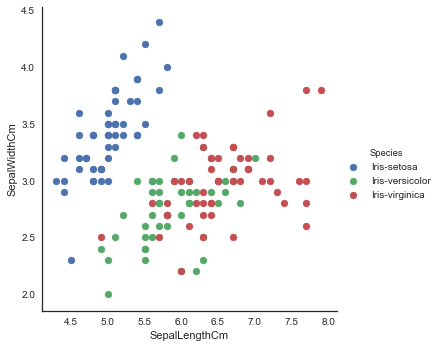

In [118]:
#sepal length vs width
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

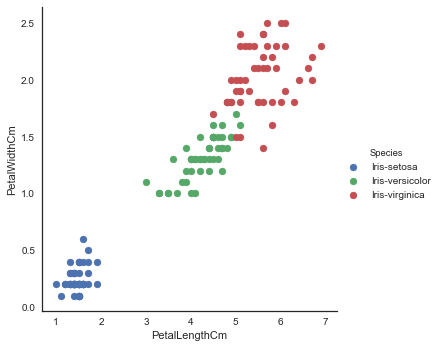

In [119]:
#pedal length vs width
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

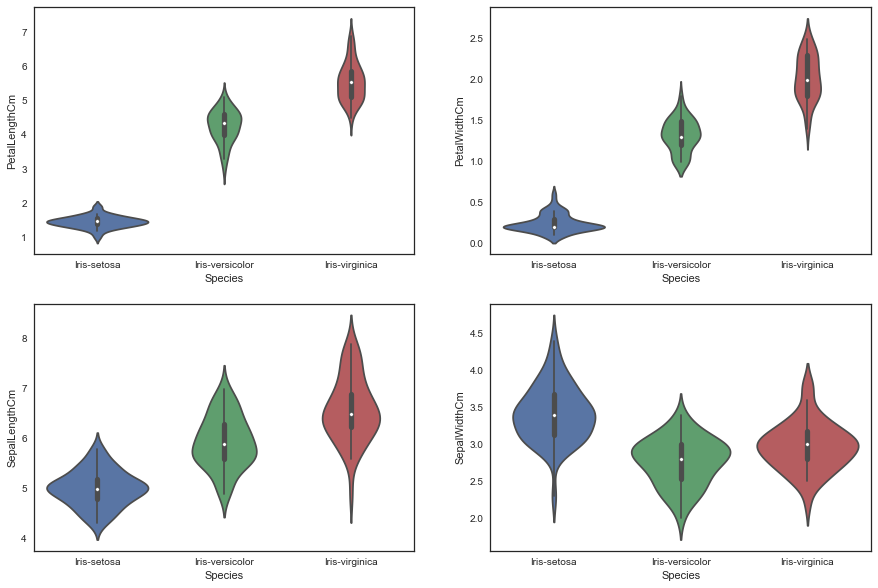

In [120]:
#this is to show directly how pedal/sepal length and width distribution 
#wrt species
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

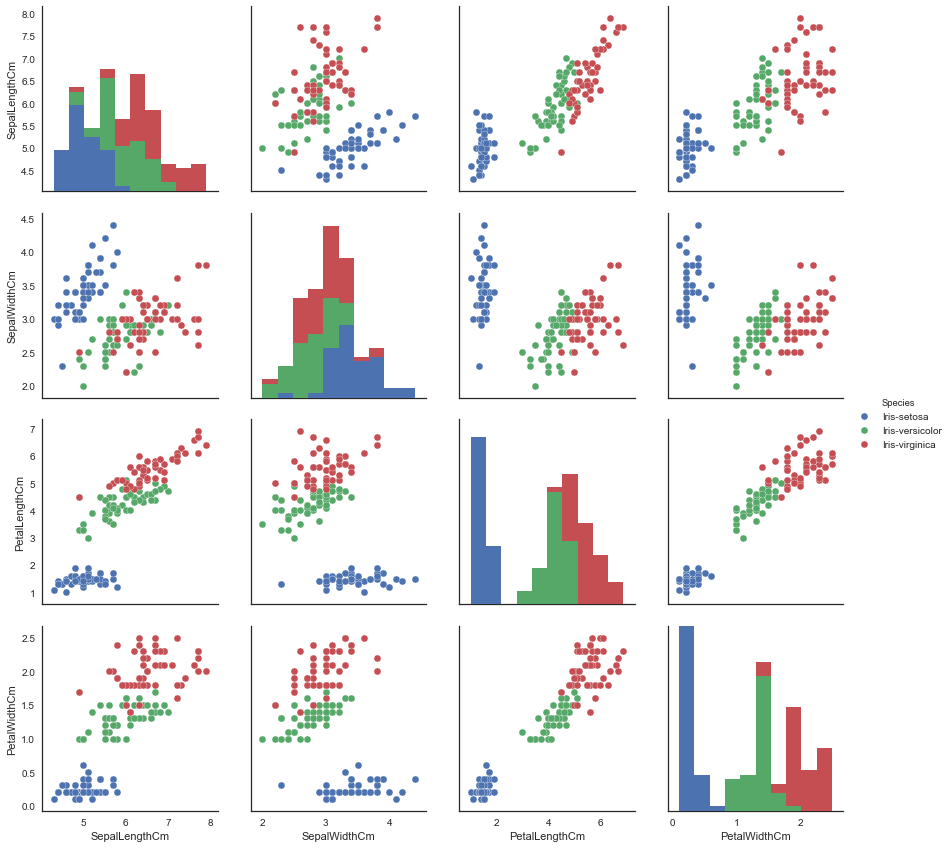

In [121]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

Decision Boundaries

In [122]:
# Create subset for setosa and versicolor

y = df.iloc[1:101, 5].values # values returns the series as array-like
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[1:101, [1,3]].values

In [123]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
    
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [124]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y ==cl, 0],
                   y=X[y ==cl, 1],
                   alpha = 0.8,
                   c = colors[idx],
                   marker = markers[idx],
                   label = cl,
                   edgecolor = 'black')
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:,0], X_test[:, 1],
                   c = '', edgecolor = 'black', alpha = 1.0,
                   linewidth = 1, marker = 'o',
                   s = 100, label = 'test set')

In [132]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [133]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1, stratify = y)

In [134]:
# standardize the features using sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [135]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=1, shuffle=True,
      verbose=0, warm_start=False)

In [136]:
# make a prediction
y_pred = ppn.predict(X_test_std)

# Different Performance Metrics
print('Misclassified samples: %d' %(y_test!=y_pred).sum() )

from sklearn.metrics import accuracy_score
print('Accuracy : %.2f' %accuracy_score(y_test, y_pred))

print('Accuracy: %.2f' %ppn.score(X_test_std, y_test))

Misclassified samples: 3
Accuracy : 0.93
Accuracy: 0.93


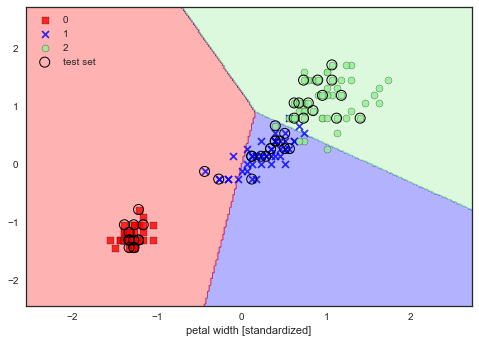

In [137]:
# plot the classification results
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, y=y_combined,
                     classifier = ppn,
                     test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

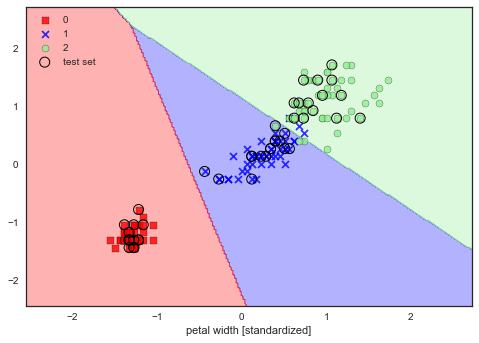

In [138]:
# training a logistic regression model with scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state = 1)
# the parameter c here is for regularization
# the smaller c is, the higher the regularization strength
# overfitting is tackled via regularization
lr.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y=y_combined,
                     classifier = lr,
                     test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()